In [1]:
# clustering models using using MNIST Fashion 
# Subset the data: pick 3 items from the Test data; 1-Trouser, 3-Dress, 7-sneaker
# Use principal component analysis (PCA) is to reduce the dimensionality 

# loading libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# load dataset
#   Training data
df_training = pd.read_csv('C:\\Users\\rivas\\OneDrive\\Documents\\JMR\\Education\\Springboard\\Projects\\Capstone1\\fashionmnisttrain.csv')

# Select subset of items
train_subset = df_training.loc[df_training['label'].isin([1,3,7])]

#   split data table into data Features (x) and class labels (y)
xdf_train = train_subset.iloc[:, 1:]
ydf_train = train_subset.iloc[:, :1]



In [2]:
#   Convert to numpy array
x_train = xdf_train.as_matrix()
y_train = ydf_train.as_matrix()

In [4]:
# Reshape array
y2_train = np.ravel( y_train[ : , 0] ) 

In [5]:
y2_train.shape


(18000,)

In [11]:
# plot sample of images
frst_img = np.where(y2_train==1)[0][0]
secnd_img = np.where(y2_train==3)[0][0]
thrd_img = np.where(y2_train==7)[0][0]

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x_train[[frst_img, secnd_img, thrd_img]],
                                          y2_train[[frst_img, secnd_img, thrd_img]])):
 plt.subplot(1, 3, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Image: %i\n' % label, fontsize = 20)

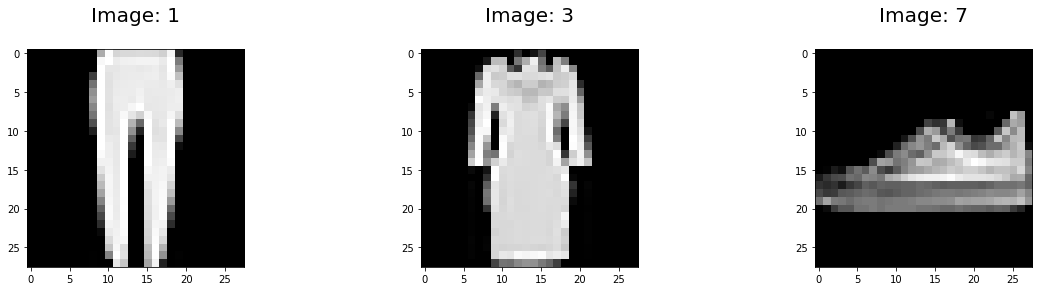

In [12]:
plt.show()


In [13]:
# Use principal component analysis (PCA) is to reduce the dimensionality
# Standardizing
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(x_train)

# PCA in scikit-learn
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)


C:\Users\rivas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


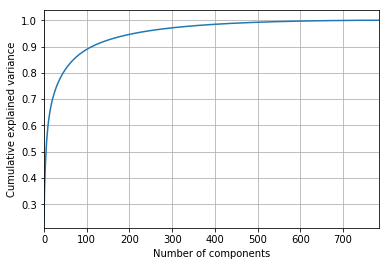

In [14]:
# Plot to find Number of components
#

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,784,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid(True)
plt.show()


In [15]:
from datetime import datetime
#**********************************************
# Using 50 components
time_strt = datetime.now()
#
sklearn50_pca = PCA(n_components=50)
X_50 = sklearn50_pca.fit_transform(X_std)
#
time_fin = datetime.now()
print("Running time: ")
print(time_fin - time_strt)


Running time: 
0:00:02.548481


In [16]:
X_50.shape

(18000, 50)

In [17]:
# Using 600 components
time_strt = datetime.now()
#
sklearn600_pca = PCA(n_components=600)
X_600 = sklearn600_pca.fit_transform(X_std)
#
time_fin = datetime.now()
print("Running time: ")
print(time_fin - time_strt)
#
X_600.shape


Running time: 
0:00:20.166362


(18000, 600)

In [18]:
# KMeans
# 1 - Import the model 
from sklearn import cluster

# 2 - Make an instance of the Model with 3 clusters
k_means = cluster.KMeans(n_clusters=3)


In [19]:
# 3 - fitting the model - PCA - 50  data
time_strt = datetime.now()
k_means.fit(X_50) 
time_fin = datetime.now()
print ("Fitting model with Test data: running time", (time_fin - time_strt))
y_test= k_means.labels_


Fitting model with Test data: running time 0:00:02.549842


In [20]:
# 4 - Predict - Test data
time_strt = datetime.now()
k_means_predict_test = k_means.predict(X_50)
time_fin = datetime.now()
print ("Predict with Test data: running time", (time_fin - time_strt))


Predict with Test data: running time 0:00:00.046876


In [22]:
# 5 - Evaluate accuracy
import collections

print(k_means.labels_[:100])
print(y2_train[:100])
collections.Counter(k_means_predict_test)
collections.Counter(y2_train)


[1 1 1 0 2 2 0 0 2 0 1 2 2 0 1 1 0 0 1 1 0 2 0 2 0 0 0 0 2 0 2 0 0 0 0 2 2
 0 2 0 0 0 0 1 1 2 2 0 0 2 2 2 1 0 2 1 0 2 2 2 2 1 2 0 2 0 2 0 0 0 0 2 0 0
 2 2 2 1 0 0 1 0 0 0 2 2 0 0 0 1 0 2 0 1 0 0 2 0 0 2]
[3 3 3 3 7 7 1 3 7 3 1 7 7 1 3 3 1 1 3 3 1 7 1 7 3 3 3 1 7 1 7 3 3 3 3 7 7
 3 7 1 3 1 3 3 3 7 7 1 1 7 7 7 3 1 7 3 1 7 7 7 7 3 7 3 7 1 7 3 3 1 3 7 1 1
 7 7 7 3 3 1 3 1 1 3 7 7 1 1 1 3 1 7 3 3 3 1 7 3 3 7]


Counter({1: 6000, 3: 6000, 7: 6000})

In [25]:
collections.Counter(k_means_predict_test)


Counter({0: 8882, 1: 3117, 2: 6001})

In [26]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
metrics.calinski_harabaz_score(x_train, k_means.labels_)

7500.2720453093007

In [27]:
# 3 - fitting the model - PCA - 600  data
time_strt = datetime.now()
k_means.fit(X_600) 
time_fin = datetime.now()
print ("Fitting model with Test data: running time", (time_fin - time_strt))
y_train= k_means.labels_


Fitting model with Test data: running time 0:00:18.160080


In [28]:
# 4 - Predict - Test data
time_strt = datetime.now()
k_means_predict_600 = k_means.predict(X_600)
time_fin = datetime.now()
print ("Predict with PCA 600 data: running time", (time_fin - time_strt))

Predict with PCA 600 data: running time 0:00:00.233738


In [29]:
# 5 - Evaluate accuracy
import collections

print(k_means.labels_[:100])
print(y2_train[:100])
collections.Counter(k_means_predict_test)
collections.Counter(y2_train)

[1 1 1 2 0 0 2 2 0 2 1 0 0 2 1 1 2 2 1 1 2 0 2 0 2 2 2 2 0 2 0 2 2 2 2 0 0
 2 0 2 2 2 2 1 1 0 0 2 2 0 0 0 1 2 0 1 2 0 0 0 0 1 0 2 0 2 0 2 2 2 2 0 2 2
 0 0 0 1 2 2 1 2 2 2 0 0 2 2 2 1 2 0 2 1 2 2 0 2 2 0]
[3 3 3 3 7 7 1 3 7 3 1 7 7 1 3 3 1 1 3 3 1 7 1 7 3 3 3 1 7 1 7 3 3 3 3 7 7
 3 7 1 3 1 3 3 3 7 7 1 1 7 7 7 3 1 7 3 1 7 7 7 7 3 7 3 7 1 7 3 3 1 3 7 1 1
 7 7 7 3 3 1 3 1 1 3 7 7 1 1 1 3 1 7 3 3 3 1 7 3 3 7]


Counter({1: 6000, 3: 6000, 7: 6000})

In [30]:
collections.Counter(k_means_predict_test)

Counter({0: 8882, 1: 3117, 2: 6001})

In [31]:
y_50 = y_test
y_600 = y_train


In [32]:
metrics.calinski_harabaz_score(X_600, k_means.labels_)


3573.8677183795489

In [33]:
metrics.calinski_harabaz_score(X_50, y_50)

4832.8869766355647

In [34]:
# Gaussian Mixture
# 1 - Import the model 
from sklearn.mixture import GaussianMixture


# 2 - Make an instance of the Model with 3 components
GMM_model= GaussianMixture(n_components=3, covariance_type='full')


In [37]:
# 3 - fitting the model - PCA-50 data
time_strt = datetime.now()
GMM_model.fit(X_50)
time_fin = datetime.now()
print ("Fitting model with PCA-50 data: running time", (time_fin - time_strt))


Fitting model with PCA-50 data: running time 0:00:06.404478


In [38]:
# 4 Predict the Model
time_strt = datetime.now()
GMM_predict_50 = GMM_model.predict(X_50)
time_fin = datetime.now()
print ("Prediciting model with PCA-50 data: running time", (time_fin - time_strt))


Prediciting model with PCA-50 data: running time 0:00:00.155202


In [39]:
# 5 - Evaluate accuracy
print(GMM_predict_50[:100])
print(y2_train[:100])
collections.Counter(GMM_predict_50)
collections.Counter(y2_train)


[1 0 1 1 2 2 1 1 0 1 1 2 2 1 0 0 1 1 0 1 1 2 1 2 1 1 1 1 2 1 2 1 1 1 1 2 2
 1 2 1 1 1 1 1 1 2 2 1 0 2 2 2 0 1 2 1 1 2 2 2 0 1 2 1 2 1 2 1 1 1 1 2 1 1
 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 1 0 1 1 2 1 1 2]
[3 3 3 3 7 7 1 3 7 3 1 7 7 1 3 3 1 1 3 3 1 7 1 7 3 3 3 1 7 1 7 3 3 3 3 7 7
 3 7 1 3 1 3 3 3 7 7 1 1 7 7 7 3 1 7 3 1 7 7 7 7 3 7 3 7 1 7 3 3 1 3 7 1 1
 7 7 7 3 3 1 3 1 1 3 7 7 1 1 1 3 1 7 3 3 3 1 7 3 3 7]


Counter({1: 6000, 3: 6000, 7: 6000})

In [40]:
collections.Counter(GMM_predict_50)


Counter({0: 2609, 1: 9939, 2: 5452})

In [41]:
# 3 - fitting the model - PCA-600 data
time_strt = datetime.now()
GMM_model.fit(X_600)
time_fin = datetime.now()
print ("Fitting model with PCA-600 data: running time", (time_fin - time_strt))


Fitting model with PCA-600 data: running time 0:01:36.315536


In [42]:
# 4 Predict the Model
time_strt = datetime.now()
GMM_predict_600 = GMM_model.predict(X_600)
time_fin = datetime.now()
print ("Prediciting model with PCA-600  data: running time", (time_fin - time_strt))


Prediciting model with PCA-600  data: running time 0:00:03.630037


In [43]:
# 5 - Evaluate accuracy
print(GMM_predict_600[:100])
print(y2_train[:100])
collections.Counter(GMM_predict_600)
collections.Counter(y2_train)

[2 1 2 2 0 0 2 2 0 2 2 0 0 2 1 1 2 2 1 2 2 0 2 0 2 2 2 2 0 2 0 2 2 2 2 0 0
 2 0 2 2 2 2 2 2 0 0 2 1 0 0 0 1 2 0 1 2 0 0 0 0 1 0 2 0 2 0 2 2 2 2 0 2 2
 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 0 2 1 2 2 0 2 2 0]
[3 3 3 3 7 7 1 3 7 3 1 7 7 1 3 3 1 1 3 3 1 7 1 7 3 3 3 1 7 1 7 3 3 3 3 7 7
 3 7 1 3 1 3 3 3 7 7 1 1 7 7 7 3 1 7 3 1 7 7 7 7 3 7 3 7 1 7 3 3 1 3 7 1 1
 7 7 7 3 3 1 3 1 1 3 7 7 1 1 1 3 1 7 3 3 3 1 7 3 3 7]


Counter({1: 6000, 3: 6000, 7: 6000})

In [44]:
collections.Counter(GMM_predict_600)

Counter({0: 5998, 1: 2118, 2: 9884})

In [45]:
metrics.calinski_harabaz_score(X_50, GMM_predict_50)

4012.2393453427967

In [46]:
metrics.calinski_harabaz_score(X_600, GMM_predict_600)

3336.6096145020206

In [47]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
    

In [48]:
print ('\n confussion matrix:\n',confusion_matrix(y2_train, GMM_predict_600))


 confussion matrix:
 [[   0    0    0    0    0]
 [   1  238 5761    0    0]
 [   0    0    0    0    0]
 [   5 1873 4122    0    0]
 [5992    7    1    0    0]]


In [49]:
print ('\n confussion matrix:\n',confusion_matrix(y2_train, GMM_predict_50))


 confussion matrix:
 [[   0    0    0    0    0]
 [ 323 5677    0    0    0]
 [   0    0    0    0    0]
 [1739 4261    0    0    0]
 [ 547    1 5452    0    0]]


In [50]:
# mapping Predict results to 1,3, 7
GM_50_map=GMM_predict_50[GMM_predict_50 ==0] = 7
GM_50_map=GMM_predict_50[GMM_predict_50 ==2] = 3
GM_50_map=GMM_predict_50[GMM_predict_50 ==1] = 1

In [51]:
collections.Counter(GMM_predict_50)


Counter({1: 9939, 3: 5452, 7: 2609})

In [53]:
print ('\n confussion matrix:\n',confusion_matrix(y2_train, GMM_predict_50))


 confussion matrix:
 [[5677    0  323]
 [4261    0 1739]
 [   1 5452  547]]


In [54]:
# mapping Predict results to 1,3, 7
GMM_predict_50[GMM_predict_50 ==7] = 3
GMM_predict_50[GMM_predict_50 ==2] = 7
GMM_predict_50[GMM_predict_50 ==1] = 1

In [55]:
print ('\n confussion matrix:\n',confusion_matrix(y2_train, GMM_predict_50))


 confussion matrix:
 [[5677  323    0]
 [4261 1739    0]
 [   1 5999    0]]


In [56]:
# mapping Predict results to 1,3, 7
GMM_predict_50[GMM_predict_50 ==7] = 7
GMM_predict_50[GMM_predict_50 ==3] = 4
GMM_predict_50[GMM_predict_50 ==1] = 3
GMM_predict_50[GMM_predict_50 ==4] = 1


In [57]:
print ('\n confussion matrix:\n',confusion_matrix(y2_train, GMM_predict_50))


 confussion matrix:
 [[ 323 5677    0]
 [1739 4261    0]
 [5999    1    0]]
